In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'processed_dataset.csv'
data = pd.read_csv(file_path)

In [4]:
unique_db_ids = data['db_id'].unique().tolist()
X = data['question']
y = data['db_id']
label_mapping = {db_id: idx for idx, db_id in enumerate(unique_db_ids)}
y = y.map(label_mapping)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": MultinomialNB()
}


Training Logistic Regression...

Logistic Regression - Classification Report:
                         precision    recall  f1-score   support

     california_schools       0.95      1.00      0.97        18
              financial       1.00      0.95      0.98        21
             toxicology       1.00      0.97      0.98        29
             card_games       0.97      1.00      0.99        38
     codebase_community       1.00      1.00      1.00        37
              superhero       1.00      0.96      0.98        26
              formula_1       0.97      1.00      0.99        35
    european_football_2       1.00      0.96      0.98        26
  thrombosis_prediction       1.00      1.00      1.00        33
           student_club       0.91      0.97      0.94        31
debit_card_specializing       1.00      0.92      0.96        13

               accuracy                           0.98       307
              macro avg       0.98      0.98      0.98       307
         

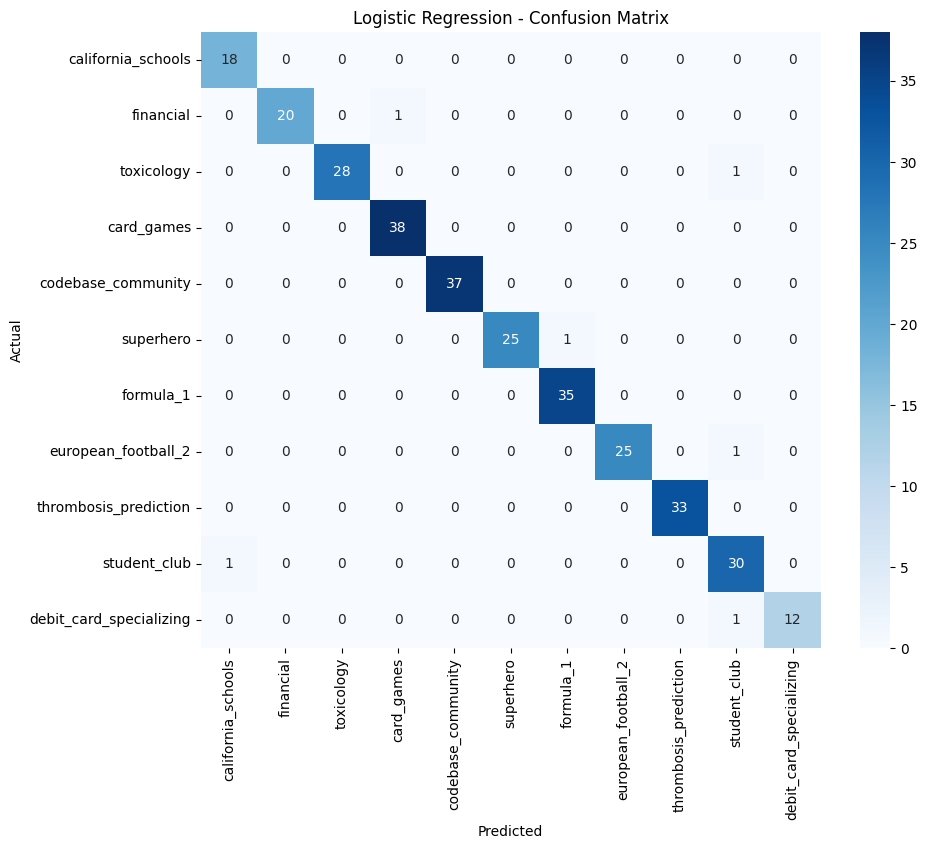


Training Random Forest...

Random Forest - Classification Report:
                         precision    recall  f1-score   support

     california_schools       1.00      1.00      1.00        18
              financial       1.00      0.81      0.89        21
             toxicology       1.00      0.97      0.98        29
             card_games       0.95      1.00      0.97        38
     codebase_community       0.97      0.97      0.97        37
              superhero       0.79      1.00      0.88        26
              formula_1       1.00      0.97      0.99        35
    european_football_2       1.00      0.96      0.98        26
  thrombosis_prediction       1.00      1.00      1.00        33
           student_club       1.00      0.90      0.95        31
debit_card_specializing       0.86      0.92      0.89        13

               accuracy                           0.96       307
              macro avg       0.96      0.96      0.96       307
           weighted a

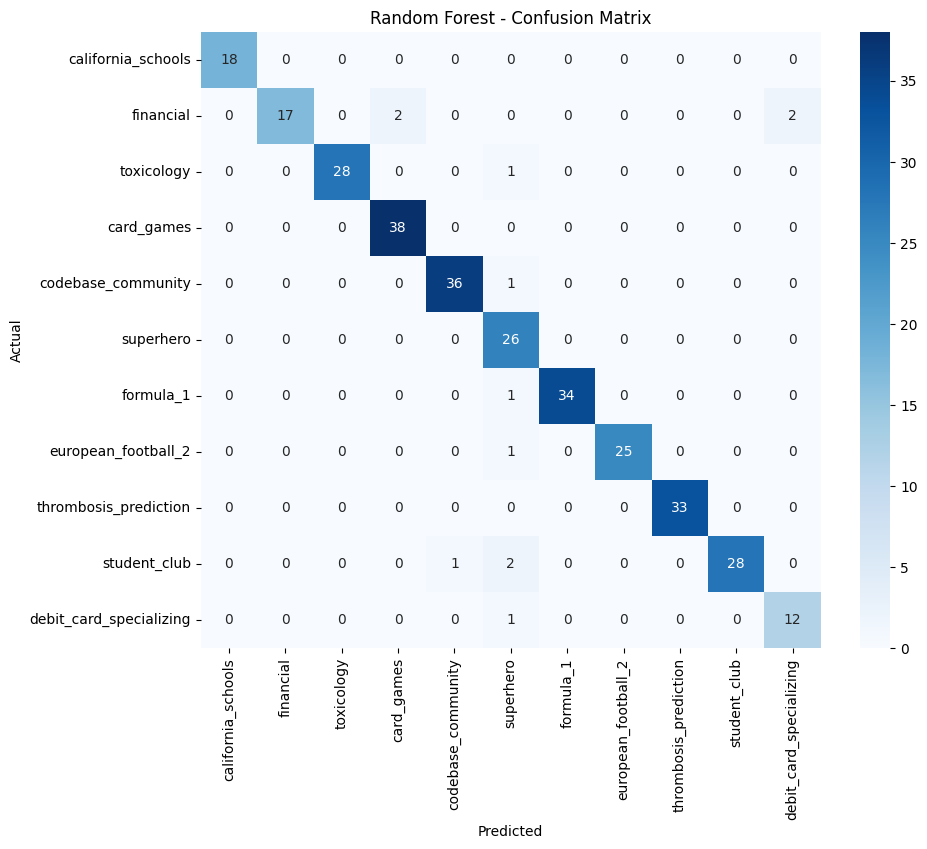


Training Naive Bayes...

Naive Bayes - Classification Report:
                         precision    recall  f1-score   support

     california_schools       0.94      0.94      0.94        18
              financial       1.00      1.00      1.00        21
             toxicology       1.00      1.00      1.00        29
             card_games       1.00      1.00      1.00        38
     codebase_community       1.00      1.00      1.00        37
              superhero       1.00      0.92      0.96        26
              formula_1       0.88      1.00      0.93        35
    european_football_2       1.00      0.96      0.98        26
  thrombosis_prediction       1.00      1.00      1.00        33
           student_club       1.00      0.97      0.98        31
debit_card_specializing       1.00      0.92      0.96        13

               accuracy                           0.98       307
              macro avg       0.98      0.97      0.98       307
           weighted avg  

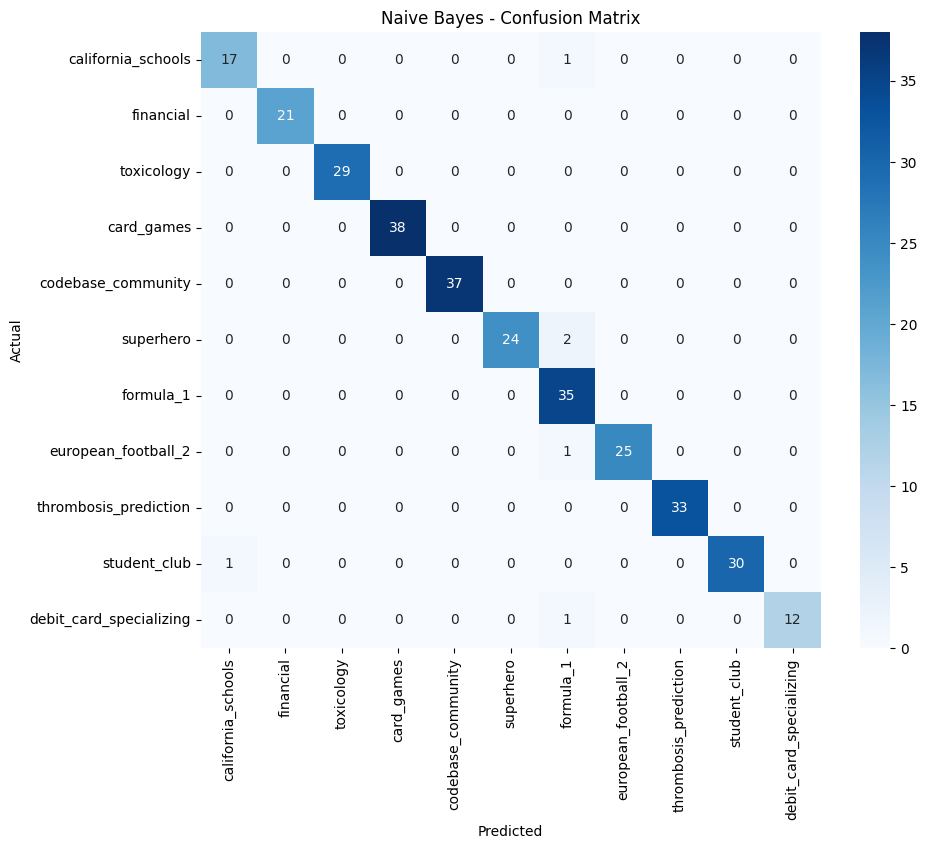

In [8]:
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    results[model_name] = {
        "Model": model,
        "Accuracy": accuracy,
        "F1 Macro": f1_macro,
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    
    print(f"\n{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred, target_names=unique_db_ids))
    
    cm = results[model_name]["Confusion Matrix"]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_db_ids, yticklabels=unique_db_ids)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [ ]:
model_names = list(results.keys())
accuracies = [results[model]["Accuracy"] for model in model_names]
f1_macros = [results[model]["F1 Macro"] for model in model_names]

In [12]:
print(accuracies)

[0.9804560260586319, 0.9609120521172638, 0.9804560260586319]


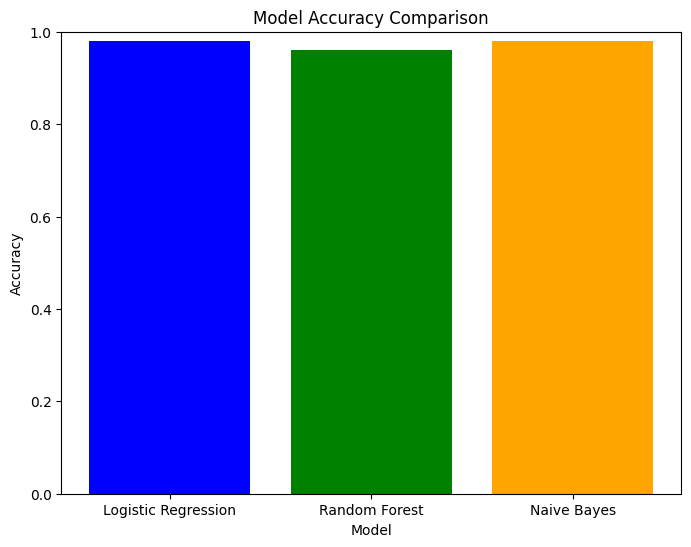

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

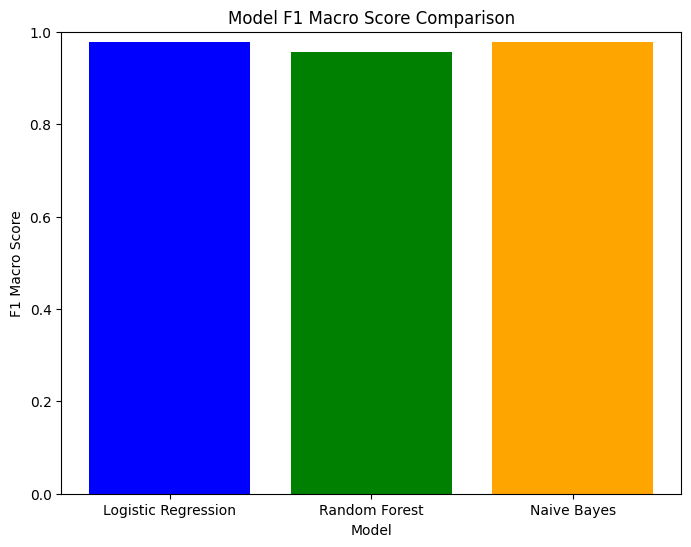

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(model_names, f1_macros, color=['blue', 'green', 'orange'])
plt.title("Model F1 Macro Score Comparison")
plt.ylabel("F1 Macro Score")
plt.xlabel("Model")
plt.ylim(0, 1)
plt.show()

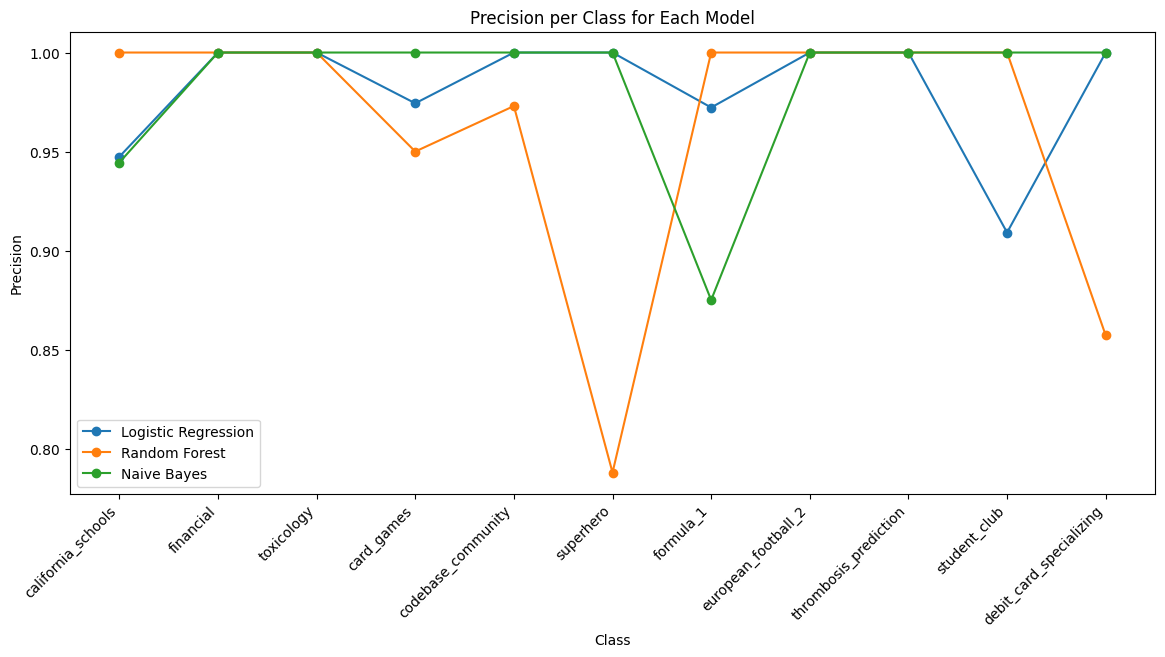

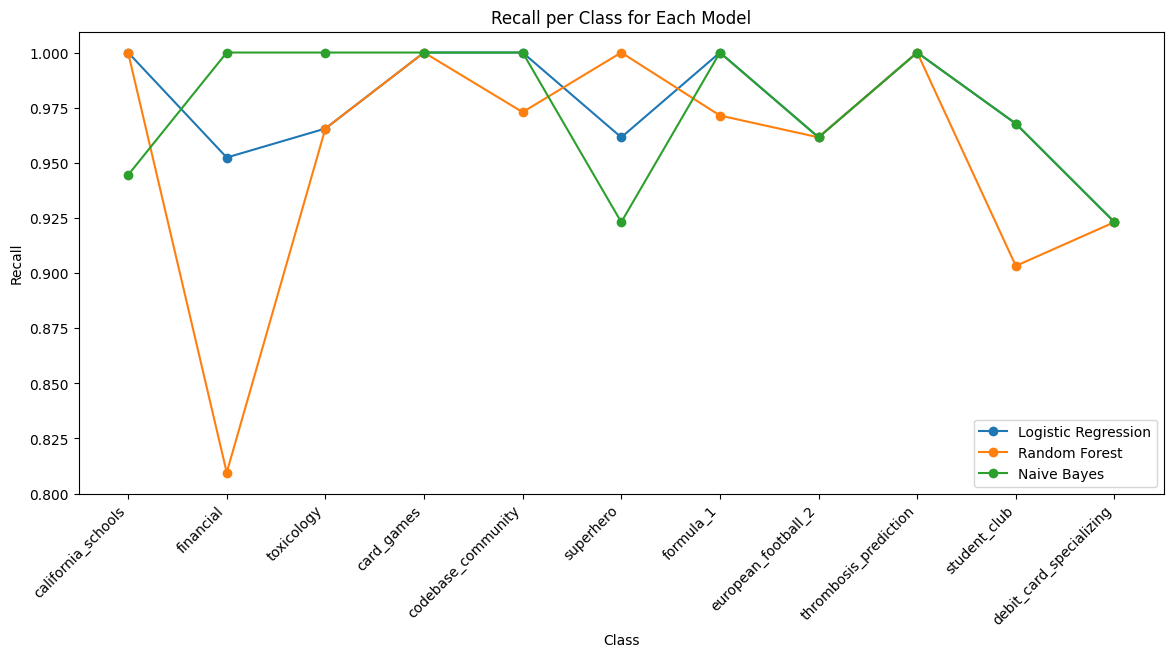

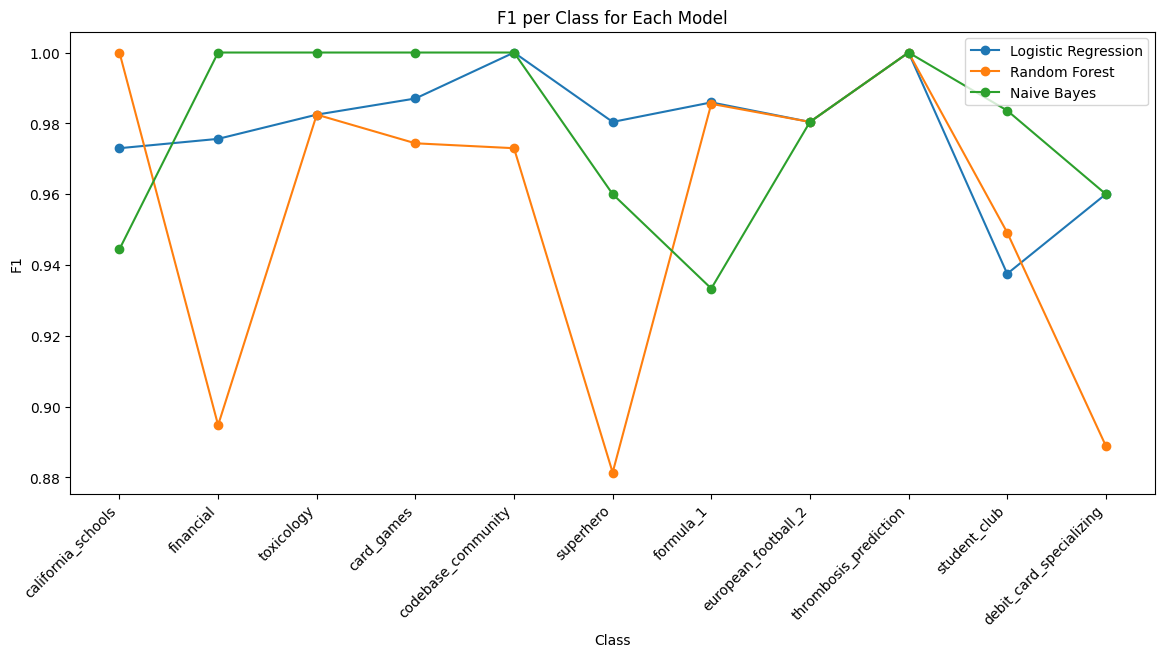

In [13]:
from sklearn.metrics import precision_recall_fscore_support

class_metrics = {}
for model_name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)
    class_metrics[model_name] = {"Precision": precision, "Recall": recall, "F1": f1}

for metric in ["Precision", "Recall", "F1"]:
    plt.figure(figsize=(14, 6))
    for model_name in class_metrics:
        plt.plot(unique_db_ids, class_metrics[model_name][metric], label=model_name, marker='o')
    plt.title(f"{metric} per Class for Each Model")
    plt.xlabel("Class")
    plt.ylabel(metric)
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.show()

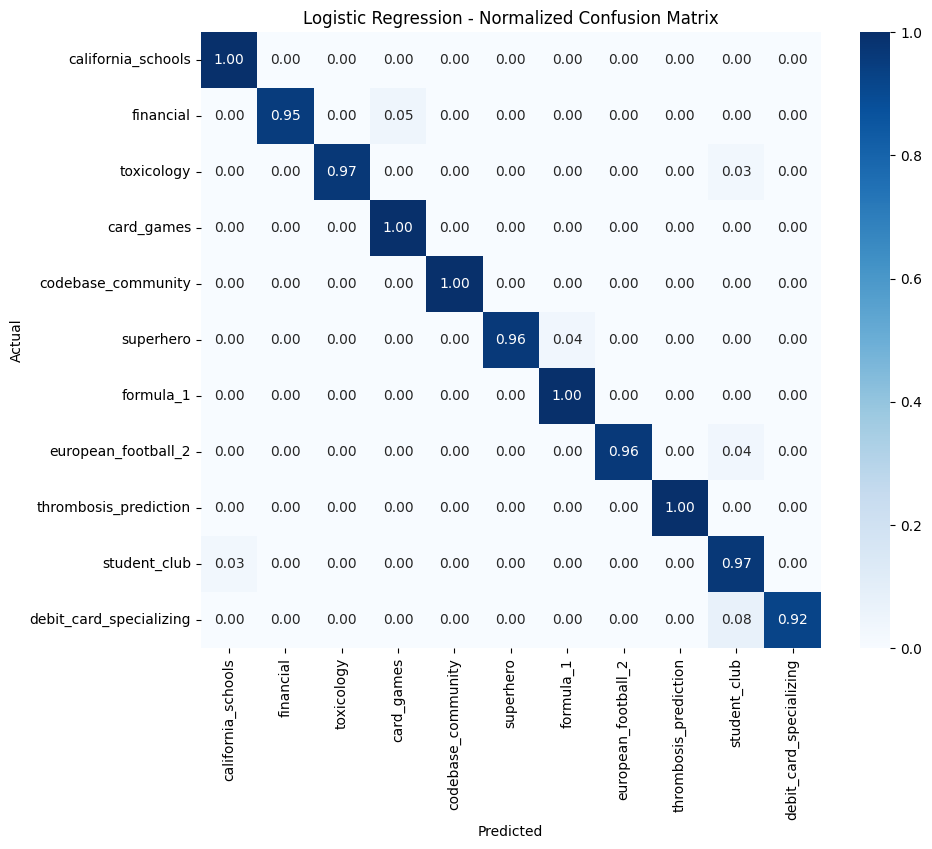

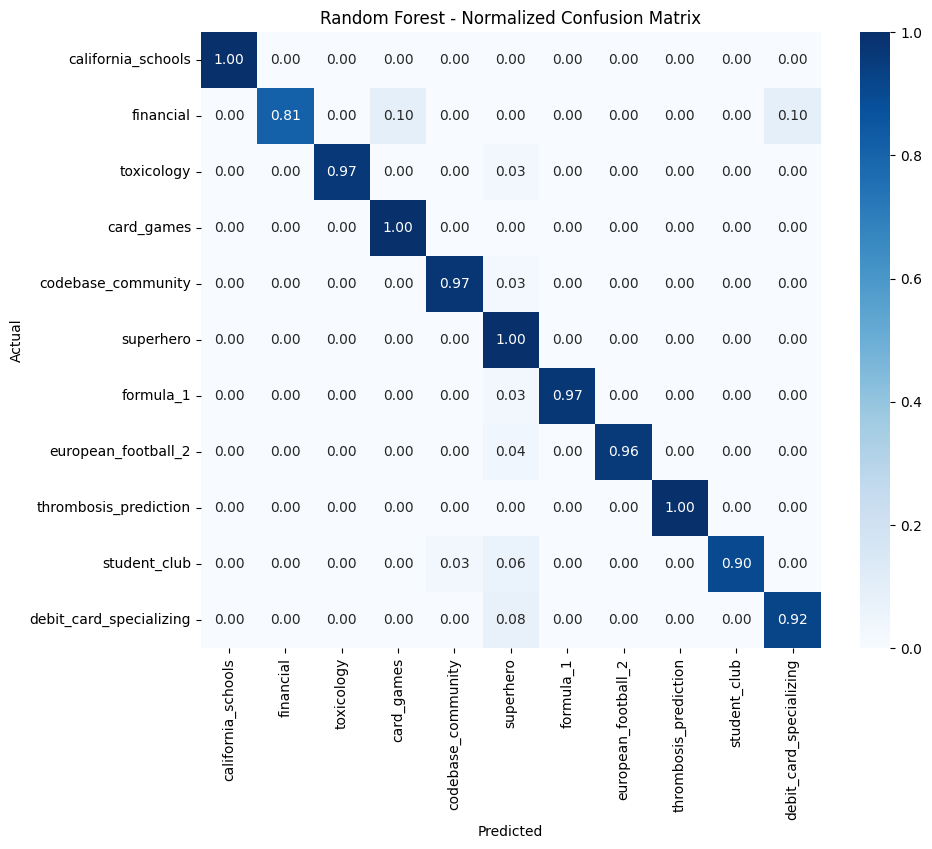

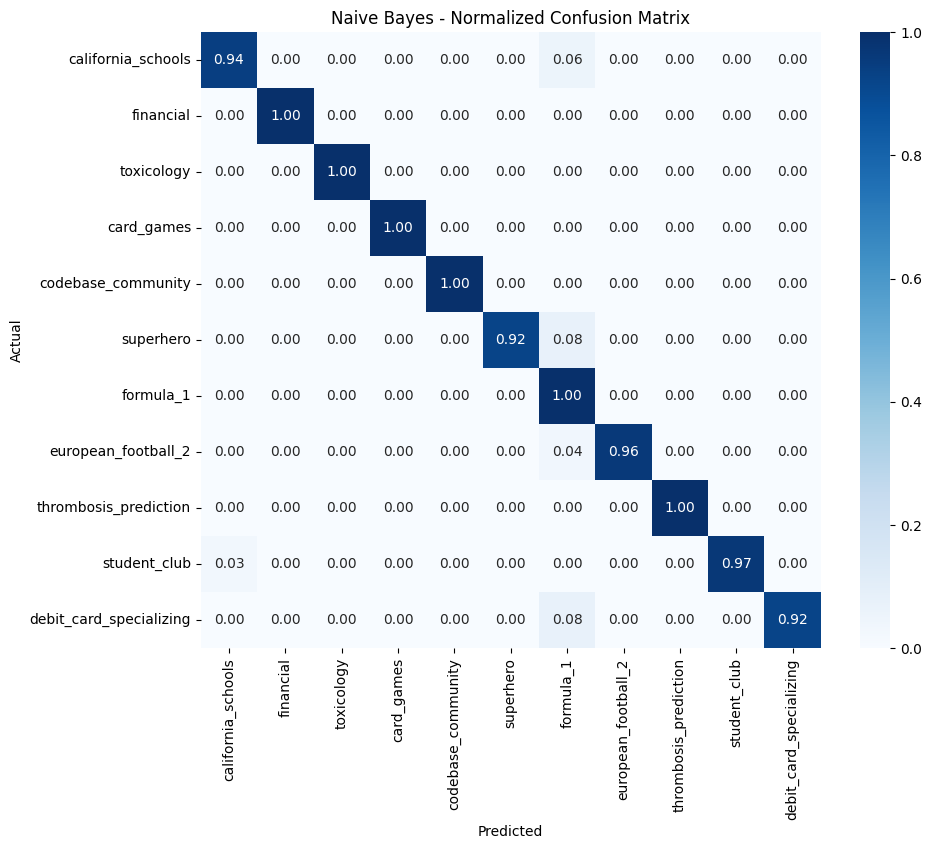

In [14]:
for model_name in models.keys():
    cm_normalized = results[model_name]["Confusion Matrix"].astype('float') / results[model_name]["Confusion Matrix"].sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=unique_db_ids, yticklabels=unique_db_ids)
    plt.title(f"{model_name} - Normalized Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

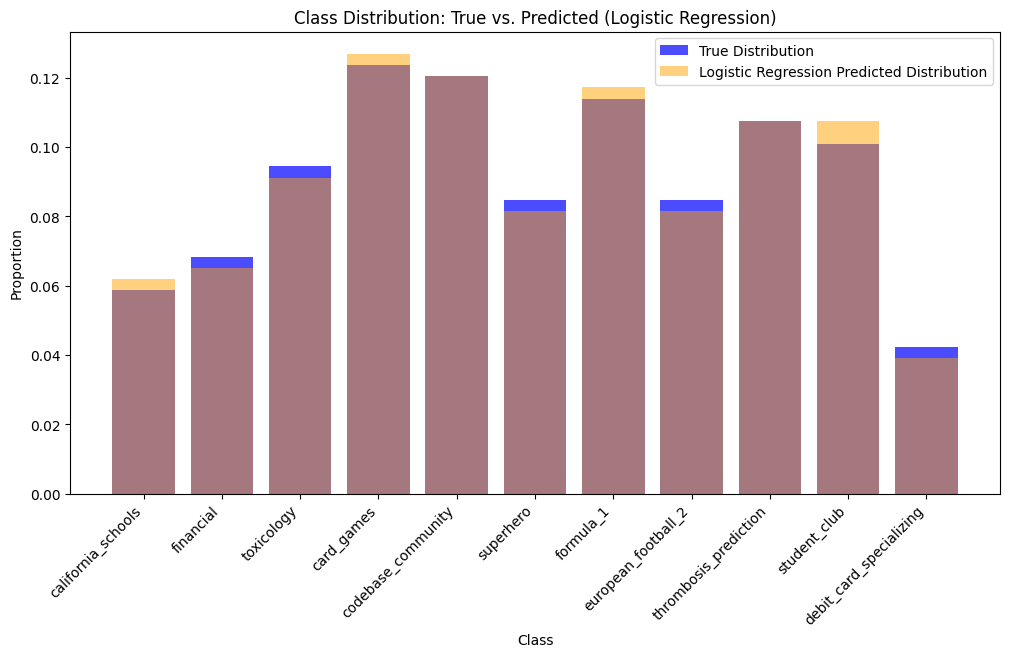

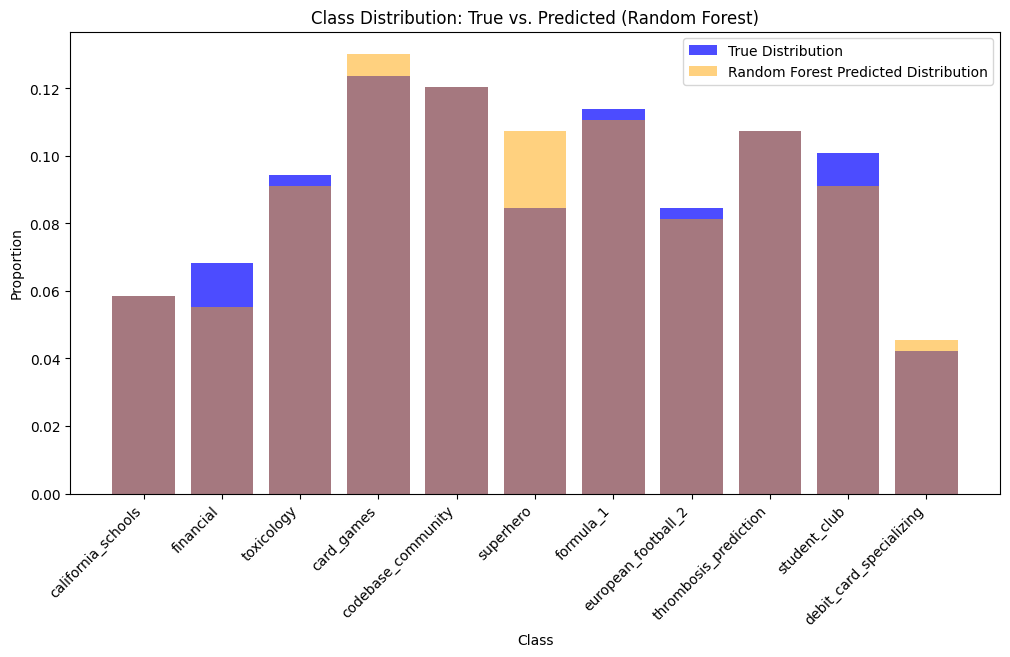

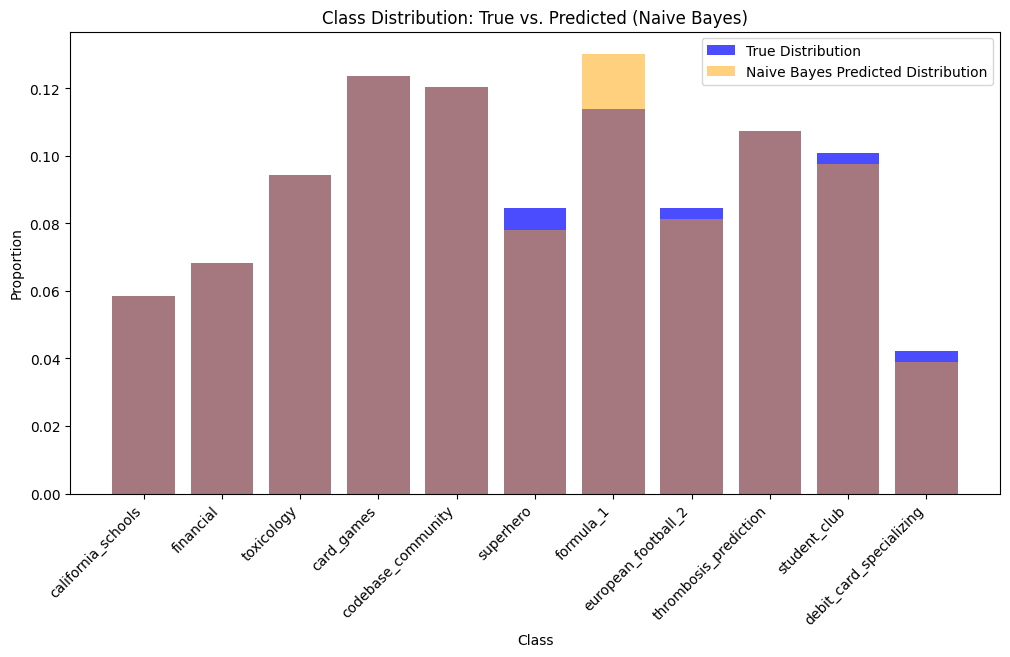

In [15]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_tfidf)
    y_pred_counts = pd.Series(y_pred).value_counts(normalize=True)
    y_test_counts = y_test.value_counts(normalize=True)
    
    plt.figure(figsize=(12, 6))
    plt.bar(unique_db_ids, y_test_counts.sort_index(), alpha=0.7, label='True Distribution', color='blue')
    plt.bar(unique_db_ids, y_pred_counts.sort_index(), alpha=0.5, label=f'{model_name} Predicted Distribution', color='orange')
    plt.title(f"Class Distribution: True vs. Predicted ({model_name})")
    plt.xlabel("Class")
    plt.ylabel("Proportion")
    plt.xticks(rotation=45, ha="right")
    plt.legend()
    plt.show()

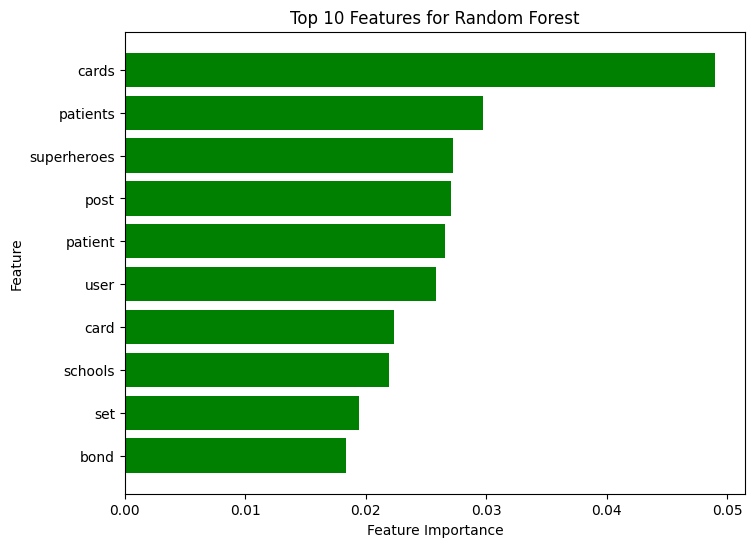

In [16]:
feature_importances = models["Random Forest"].feature_importances_
top_indices = np.argsort(feature_importances)[-10:]
top_features = np.array(tfidf_vectorizer.get_feature_names_out())[top_indices]
top_importance = feature_importances[top_indices]

plt.figure(figsize=(8, 6))
plt.barh(top_features, top_importance, color="green")
plt.title("Top 10 Features for Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

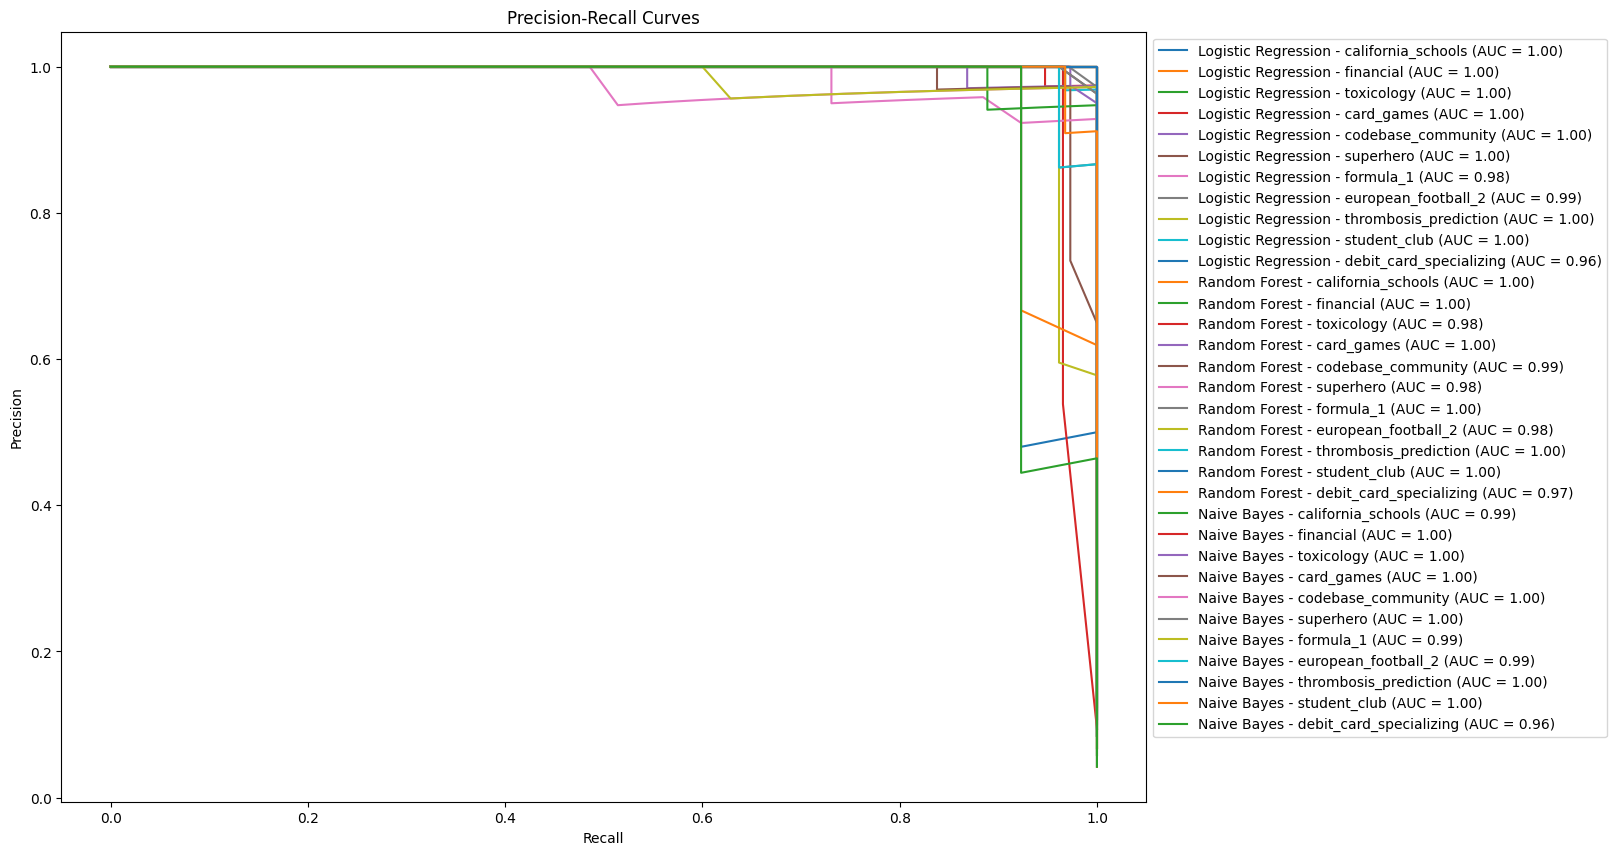

In [17]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc

y_test_binarized = label_binarize(y_test, classes=range(len(unique_db_ids)))

plt.figure(figsize=(14, 10))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_tfidf)
        for i, class_name in enumerate(unique_db_ids):
            precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
            auc_score = auc(recall, precision)
            plt.plot(recall, precision, label=f"{model_name} - {class_name} (AUC = {auc_score:.2f})")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best", bbox_to_anchor=(1, 1))
plt.show()

In [18]:
for model_name in models.keys():
    cm = results[model_name]["Confusion Matrix"]
    most_confused = np.unravel_index(np.argmax(cm - np.diag(np.diag(cm))), cm.shape)
    print(f"{model_name} - Most Confused Classes: {unique_db_ids[most_confused[0]]} -> {unique_db_ids[most_confused[1]]}")

Logistic Regression - Most Confused Classes: financial -> card_games
Random Forest - Most Confused Classes: financial -> card_games
Naive Bayes - Most Confused Classes: superhero -> formula_1


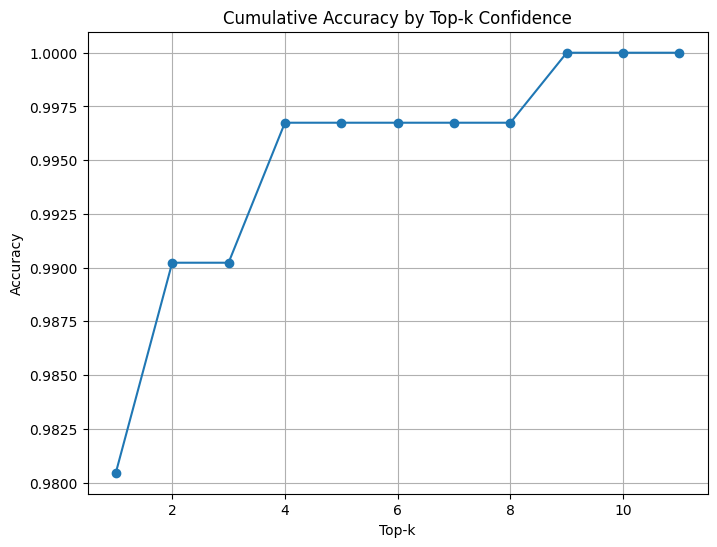

In [19]:
if hasattr(models["Logistic Regression"], "predict_proba"):
    proba = models["Logistic Regression"].predict_proba(X_test_tfidf)
    sorted_indices = np.argsort(-proba, axis=1)
    
    cumulative_accuracy = []
    for k in range(1, len(unique_db_ids) + 1):
        correct = 0
        for i, true_label in enumerate(y_test):
            if true_label in sorted_indices[i, :k]:
                correct += 1
        cumulative_accuracy.append(correct / len(y_test))
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(unique_db_ids) + 1), cumulative_accuracy, marker="o")
    plt.title("Cumulative Accuracy by Top-k Confidence")
    plt.xlabel("Top-k")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.show()